In [1]:
using PyPlot
using VAE: trainVAE, DataLoader, next_batch, reconstruct, transform, generate
using TensorFlow

In [6]:
## Fit model
network_architecture = Dict("n_hidden_recog_1" => 500, # 1st layer encoder neurons
         "n_hidden_recog_2"=>500, # 2nd layer encoder neurons
         "n_hidden_gener_1"=>500, # 1st layer decoder neurons
         "n_hidden_gener_2"=>500, # 2nd layer decoder neurons
         "n_input"=>784, # MNIST data input (img shape: 28*28)
         "n_z"=>20)  # dimensionality of latent space

vae = trainVAE(network_architecture, training_epochs=75)

Epoch 1, current loss is 167.637415541.
Epoch 2, current loss is 122.956999427.
Epoch 3, current loss is 111.999640083.
Epoch 4, current loss is 106.966167469.
Epoch 5, current loss is 103.961932762.
Epoch 6, current loss is 101.802036275.
Epoch 7, current loss is 99.957122002.
Epoch 8, current loss is 98.262289025.
Epoch 9, current loss is 96.781520874.
Epoch 10, current loss is 95.471031001.
Epoch 11, current loss is 94.333917247.
Epoch 12, current loss is 93.339710631.
Epoch 13, current loss is 92.481766264.
Epoch 14, current loss is 91.741666644.
Epoch 15, current loss is 91.069216249.
Epoch 16, current loss is 90.431206393.
Epoch 17, current loss is 89.839382877.
Epoch 18, current loss is 89.289296550.
Epoch 19, current loss is 88.764679232.
Epoch 20, current loss is 88.245210767.
Epoch 21, current loss is 87.746068836.
Epoch 22, current loss is 87.271294484.
Epoch 23, current loss is 86.806348547.
Epoch 24, current loss is 86.352404291.
Epoch 25, current loss is 85.926957260.
Epo

VAE.VariationalAutoEncoder(Session(Ptr{Void} @0x00007f5ec7c8f850), <Tensor placeholder:1 shape=(?, 784) dtype=Float32>, <Tensor Add_5:1 shape=(?, 20) dtype=Float32>, <Tensor Sigmoid:1 shape=(?, 784) dtype=Float32>, <Tensor Add_3:1 shape=(?, 20) dtype=Float32>, <Tensor Add_4:1 shape=(?, 20) dtype=Float32>, <Tensor reduce_3:1 shape=() dtype=Float64>, <Tensor Group:1 shape=unknown dtype=Any>, VAE.DataLoader(1, [2970, 8656, 7156, 6165, 47052, 1238, 14664, 21286, 18194, 2765  …  26597, 24187, 38016, 3684, 37205, 7073, 47518, 31135, 47234, 38561]))

In [7]:
## compute Loss after fitting
x_sample = next_batch(vae.loader, 100)[1]
x_sample = broadcast(/,x_sample,maximum(x_sample,2))
cur_loss, = run(vae.sess, vae.Loss, Dict(vae.x => x_sample))

75.37164863924323

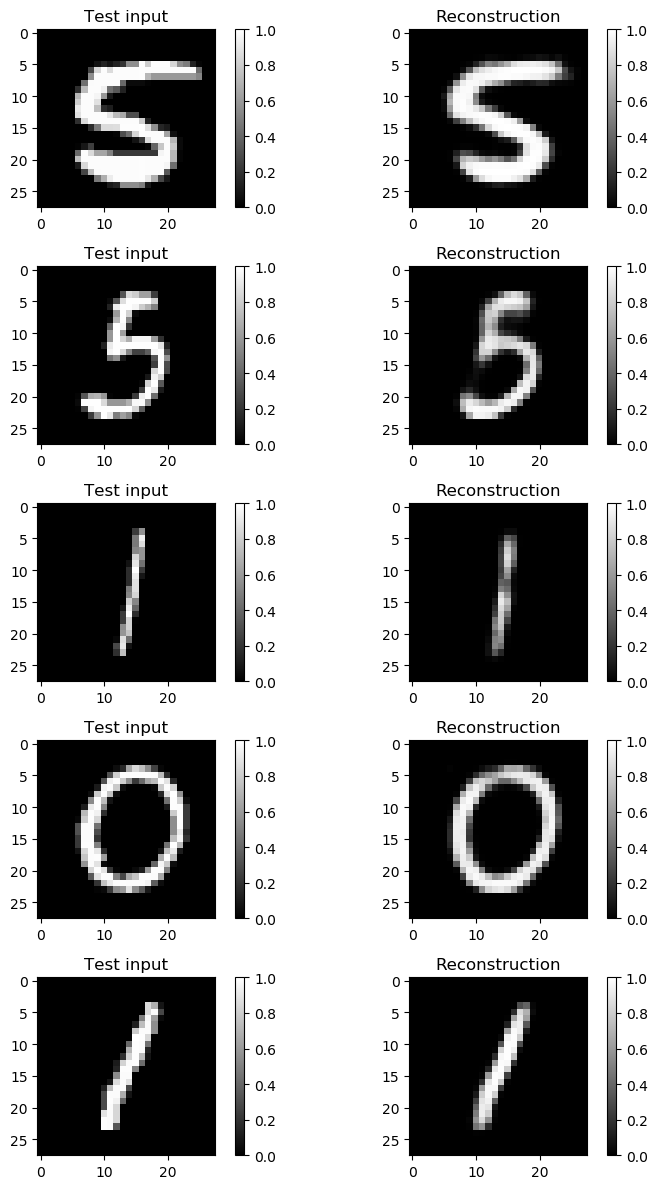

In [8]:
## plot some reconstructed samples
x_sample = next_batch(vae.loader, 100)[1]
x_sample = broadcast(/,x_sample,maximum(x_sample,2));
x_reconstruct = reconstruct(vae, x_sample)

figure(figsize=(8, 12))

for i in 1:5

    subplot(5, 2, 2*i-1)
    imshow(reshape(x_sample[i,:], 28, 28), vmin=0, vmax=1, cmap="gray")
    title("Test input")
    colorbar()
    
    subplot(5, 2, 2*i)
    imshow(reshape(x_reconstruct[i,:], 28, 28), vmin=0, vmax=1, cmap="gray")
    title("Reconstruction")
    colorbar()
end

tight_layout()

In [2]:
## Look at latent space
network_architecture = Dict("n_hidden_recog_1" => 500, # 1st layer encoder neurons
         "n_hidden_recog_2"=>500, # 2nd layer encoder neurons
         "n_hidden_gener_1"=>500, # 1st layer decoder neurons
         "n_hidden_gener_2"=>500, # 2nd layer decoder neurons
         "n_input"=>784, # MNIST data input (img shape: 28*28)
         "n_z"=>2)  # dimensionality of latent space

vae2D = trainVAE(network_architecture, training_epochs=75)

2018-11-28 16:09:47.953612: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA


Epoch 1, current loss is 185.587142357.
Epoch 2, current loss is 164.643203775.
Epoch 3, current loss is 159.645716633.
Epoch 4, current loss is 156.412944741.
Epoch 5, current loss is 154.391008628.
Epoch 6, current loss is 152.860697040.
Epoch 7, current loss is 151.542582487.
Epoch 8, current loss is 150.394332664.
Epoch 9, current loss is 149.401969234.
Epoch 10, current loss is 148.516405905.
Epoch 11, current loss is 147.701632429.
Epoch 12, current loss is 146.995000234.
Epoch 13, current loss is 146.414155131.
Epoch 14, current loss is 145.855861049.
Epoch 15, current loss is 145.397497854.
Epoch 16, current loss is 144.954420237.
Epoch 17, current loss is 144.639748331.
Epoch 18, current loss is 144.306180115.
Epoch 19, current loss is 143.990983975.
Epoch 20, current loss is 143.672762983.
Epoch 21, current loss is 143.469378142.
Epoch 22, current loss is 143.219031509.
Epoch 23, current loss is 142.941854951.
Epoch 24, current loss is 142.779400805.
Epoch 25, current loss is

VAE.VariationalAutoEncoder(Session(Ptr{Void} @0x00007f5eca7a9f10), <Tensor placeholder:1 shape=(?, 784) dtype=Float32>, <Tensor Add_5:1 shape=(?, 2) dtype=Float32>, <Tensor Sigmoid:1 shape=(?, 784) dtype=Float32>, <Tensor Add_3:1 shape=(?, 2) dtype=Float32>, <Tensor Add_4:1 shape=(?, 2) dtype=Float32>, <Tensor reduce_3:1 shape=() dtype=Float64>, <Tensor Group:1 shape=unknown dtype=Any>, VAE.DataLoader(1, [38854, 30815, 17282, 53127, 37598, 7922, 12348, 28298, 59403, 21210  …  42646, 47827, 29750, 36290, 45038, 9309, 44523, 4000, 12399, 53954]))

In [3]:
## compute Loss after fitting
x_sample = next_batch(vae2D.loader, 100)[1]
x_sample = broadcast(/,x_sample,maximum(x_sample,2))
cur_loss, = run(vae2D.sess, vae2D.Loss, Dict(vae2D.x => x_sample))

142.2965336179572

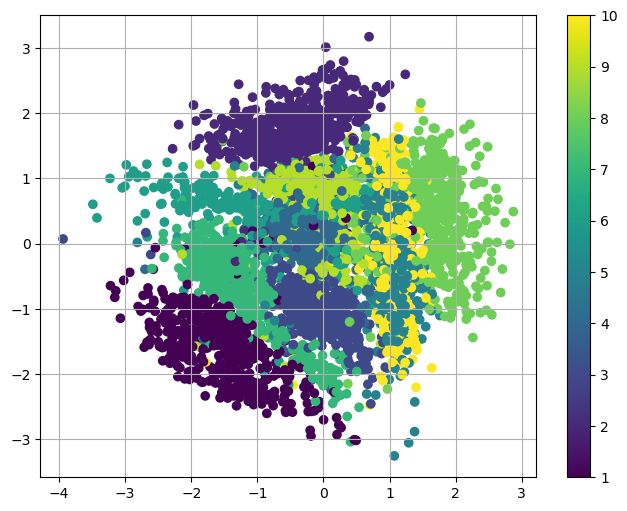

In [4]:
#plot the data in the latent space
x_sample, y_sample = next_batch(vae2D.loader, 5000)
x_sample = broadcast(/,x_sample,maximum(x_sample,2));
z_mu = transform(vae2D, x_sample)

figure(figsize=(8, 6)) 
scatter(z_mu[:, 1], z_mu[:, 2], c=vec(mapslices(indmax,y_sample,dims=2)))
colorbar()
grid()

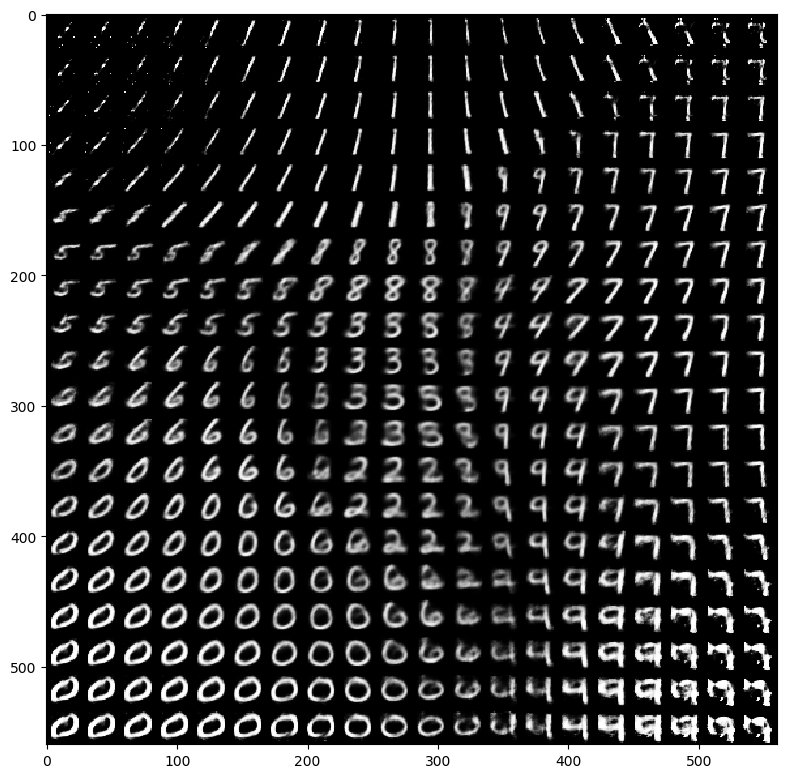

In [5]:
#project up to x-space from z-space
nx = ny = 20
x_values = linspace(-3, 3, nx)
y_values = linspace(-3, 3, ny)

canvas = Array{Float32,2}(28*ny, 28*nx);

for (i, yi) in enumerate(x_values)
    for (j, xi) in enumerate(y_values)
        z_mu = repmat([xi,yi]',100,1)
        x_mean = generate(vae2D, z_mu)
        canvas[(nx-i)*28+1:(nx-i+1)*28, (j-1)*28+1:j*28] = reshape(x_mean[1,:],28,28)
    end
end

figure(figsize=(8, 10))        
imshow(canvas, origin="upper", cmap="gray")
tight_layout()